<center> <h2> EM algorithm

Suppose we have an <i>unobservable</i> random variable $X$ such that $\mathbb{P}(X=1) = 1 - \mathbb{P}(X=0) = \theta$. Furthermore we have an <i>observable</i> random variable $Y$ such that the conditionals are 
\begin{align*}
Y \vert X=0 & \sim g(y ;\mu_0, \sigma_0) \\
Y \vert X=1 & \sim g(y ;\mu_1, \sigma_1),
\end{align*}
where $g_i$ is a Gaussian distribution and the parameters $\mu_i, \sigma_i, \,\,i=0,1$ are known. The probability $\theta$ is unknown however.

Our goal is to estimate the probabilty by observing samples from $Y\vert X=x$ using Baysian statistics (EM-algorithm).
Let $\mathbf{y} = (y_0, y_1,...,y_n)$ be $n$ samples from $Y\vert X=x$ and denote the corresponding unobserable samples as $\mathbf{x} = (x_0, x_1,...,x_n)$

We start by writing the log-likelihood up to normalizing constants for the function $\theta \mapsto f_\theta(\mathbf{x},\mathbf{y})$, where $f_\theta$ is the joint distribution dependent on $\theta$.
The joint distribution is
$$f_\theta(\mathbf{x},\mathbf{y}) = \prod_{i=1}^n (\theta g(y ;\mu_1, \sigma_1))^{\mathbb{1}(x=1)} ((1-\theta) g(y ;\mu_0, \sigma_0))^{\mathbb{1}(x=0)},$$
where $\mathbb{1}$ is the indicator function. 
Take the logarithm of this and neglecting everything not dependent on $\theta$ to get
$$\log{f_\theta(\mathbf{x},\mathbf{y}) } \stackrel{c}{=} \sum_{i=1}^n \left[ \mathbb{1}(x=1)\log(\theta) + \mathbb{1}(x=0)\log{(1-\theta)} \right].$$
Here we can see that $$f_\theta(\mathbf{x}\,\vert\, \mathbf{y}) \propto f_\theta(\mathbf{x},\mathbf{y}),$$
since all terms are dependent on $x$.

<h4>The expectation step:</h4>
\begin{align*}
\mathcal{Q}_{\theta'}(\theta ) &= \mathbb{E}_{\theta'} [\log( f_\theta(\mathbf{x},\mathbf{y}))\,\vert\, Y = \mathbf{y} ]\\
& = \mathbb{E}_{\theta'}\left[\sum_{i=1}^n \left( \, \mathbb{1} (x_i = 1)\log(\theta) +  \mathbb{1} (x_i = 0)\log(1-\theta) \right) \,\vert\, Y = \mathbf{y}\right] \\
& = \sum_{i=1}^n \left( \mathbb{E}_{\theta'}[\mathbb{1} (x_i = 1)\,\vert\, Y_i= y_i] \log(\theta) + \mathbb{E}_{\theta'}[\mathbb{1} (x_i = 0)\,\vert\, Y_i= y_i]\log(1-\theta) \right)\\
& = \sum_{i=1}^n \left(\theta' \,g(y_i;\mu_1,\sigma_1)\log(\theta) +(1- \theta') g(y_i;\mu_0,\sigma_0)\log(1-\theta) \right) 
\end{align*}
In the last step we used the proportionality of the conditional distribution.
<h4>The maximization step:</h4>

Maximizing this expressing by taking the derivative w.r.t $\theta$ and setting it to zero gives us the following,

$$\frac{d}{d\theta}\mathcal{Q}_{\theta'}(\theta)  = \sum_{i=1}^n \left( \frac{\theta'}{\theta} g(y_i;\mu_1,\sigma_1) -\frac{1-\theta'}{1-\theta} g(y_i;\mu_0,\sigma_0) \right) = 0 $$
Solving this for $\theta$ gives us the iterative formula, 
$$\theta_{l+1} = \frac{1}{n}\sum_{i=1}^n \frac{\theta_l g(y_i;\mu_0,\sigma_0)}{(1-\theta_l)g(y_i;\mu_1,\sigma_1) + \theta_l g(y_i;\mu_0,\sigma_0)},$$
which is the EM-updating formula we need. Let us try this out.

In [1]:
# Generate toy data
import numpy as np
import matplotlib.pyplot as plt

def generate_toy_signal(n, theta, mu_0, sigma_0, mu_1, sigma_1):
    y = np.zeros(n)
    for i in range(n):
        r = np.random.binomial(1,1-theta)
        if r == 0:
            y[i] = np.random.normal(mu_0,sigma_0)
        else: 
            y[i] = np.random.normal(mu_1,sigma_1)
    return y

We must have access to the normal probability density,
$$g(y,\mu,\sigma)= \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left({-\frac{1}{2}\left(\frac{(y-\mu)}{\sigma}\right)^2}\right)$$

In [2]:
def g(y,mu,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-( (y-mu)/sigma )**2/2)

In [3]:
init_guess = 0.01
num_iterations=100
theta = 0.68492
mu_0 = 0.1; sigma_0 = 1; 
mu_1 = 1; sigma_1 = 2.8

y = generate_toy_signal(1000, theta, mu_0, sigma_0, mu_1, sigma_1)

# Run signal through pdf
y_0 = g(y,mu_0,sigma_0)
y_1 = g(y,mu_1,sigma_1)

theta_array = np.zeros(num_iterations+1)
theta_array[0] = init_guess

# Start the iteration process
for i in range(num_iterations):
    theta_array[i+1] = np.mean( theta_array[i]*y_0 / ( (1-theta_array[i])*y_1 + theta_array[i]*y_0 ) )

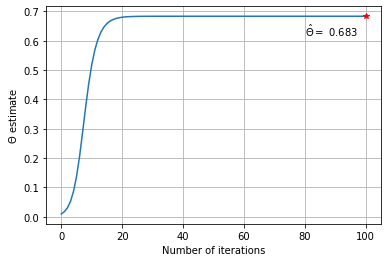

Error: 0.0014


In [4]:
fig, ax = plt.subplots()
ax.plot(theta_array)
ax.annotate('$\hat{ \Theta } = $ ' + str(theta_array[-1])[:5], (num_iterations*0.8, theta_array[-1]*0.9))
ax.plot(num_iterations, theta_array[-1],'r*')
plt.xlabel('Number of iterations')
plt.ylabel('$\Theta$ estimate')
plt.grid()
plt.show()
print('Error: ' + str(np.abs(theta-theta_array[-1]))[:6])

Seems to work just fine.

<center> <h3> Error analysis

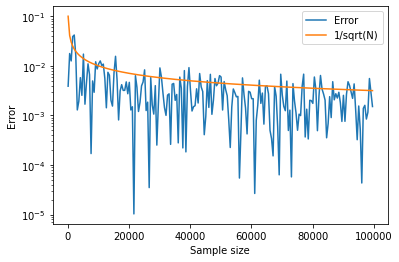

In [5]:
N = 1e5
error_array = []
iter = range(100,int(N), 500)
for i in iter:
    y = generate_toy_signal(i, theta, mu_0, sigma_0, mu_1, sigma_1)
    
# Run signal through pdf
    y_0 = g(y,mu_0,sigma_0)
    y_1 = g(y,mu_1,sigma_1)

    theta_array = np.zeros(num_iterations+1)
    theta_array[0] = init_guess

    # Start the iteration process
    for i in range(num_iterations):
        theta_array[i+1] = np.mean( theta_array[i]*y_0 / ( (1-theta_array[i])*y_1 + theta_array[i]*y_0 ) )
    error_array.append(np.abs(theta_array[-1]-theta))

plt.semilogy(list(iter),error_array, label='Error')
plt.semilogy(list(iter), 1/np.sqrt(list(iter)),label='1/sqrt(N)')
plt.ylabel('Error')
plt.xlabel('Sample size')
plt.legend()
plt.show()

As we can see, the error approximately decays as 1/sqrt(N), which is expected for a statistical error. 